In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, ttest_ind, t

In [2]:
df = pd.read_csv("default_of_credit_card_client_processed.csv")
del df['Unnamed: 0']

In [3]:
cols = np.transpose(df.columns.tolist())
cols

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'b0', 'b1', 'b2',
       'b3', 'b4', 'b5', 'ta0', 'ta1', 'ta2', 'ta3', 'ta4', 'ta5', 'SC',
       'default payment next month'], dtype='<U26')

In [4]:
df.shape

(29134, 44)

In [5]:
cols[12:18]

array(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6'], dtype='<U26')

In [6]:
for c in cols[12:18]:
    df = df[df[c] != 0 ]

In [7]:
df.shape

(23887, 44)

In [8]:
for c in cols[12:18]:
    print(df[c].max()/1000, '\t', df[c].min()/1000, '\t', df[c].mean()/1000, '\t', df[c].std()/1000)

964.511 	 -165.58 	 60.65234345041236 	 77.72070473802805
983.931 	 -67.526 	 58.98160250345376 	 75.25172862104787
1664.089 	 -157.264 	 56.89514003432829 	 73.39429184577821
891.586 	 -170.0 	 52.72228412944279 	 68.14042528946696
927.171 	 -81.334 	 49.34691405366936 	 64.3309960156949
961.664 	 -339.603 	 47.88062494243731 	 63.01717604935877


In [9]:
for c in cols[18:24]:
    print(df[c].max()/1000, '\t\t', df[c].min()/1000, '\t\t', df[c].mean()/1000, '\t\t', df[c].std()/1000)

873.552 		 0.0 		 6.38635299535312 		 17.67199852092019
1684.259 		 0.0 		 6.673244316992506 		 24.788776240025182
896.04 		 0.0 		 5.8913498137062 		 18.574558270914906
621.0 		 0.0 		 5.4584390254113115 		 16.35659139136558
426.529 		 0.0 		 5.487223510696194 		 16.070688485061503
527.143 		 0.0 		 5.804586846401809 		 17.99164347699811


In [10]:
j = np.arange(0,6)
cols[18+j]

array(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'], dtype='<U26')

In [11]:
new_cols = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6']
i = 0

for c in cols[12:18]:
    df[new_cols[i]] = df[cols[18+i]]/df[c]
    i += 1 

In [12]:
df[new_cols].head()

,R1,R2,R3,R4,R5,R6
1,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309
2,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564
3,0.042562,0.041859,0.024345,0.038850,0.036914,0.033844
4,0.232099,6.469312,0.279057,0.429799,0.035987,0.035492
5,0.038820,0.031804,0.011405,0.051562,0.050971,0.039952


In [13]:
df[df['R6']>=1].shape, df[df['R6']<1].shape

((3057, 50), (20830, 50))

In [14]:
df['R1'].mean(), df['R6'].mean(), df['R2'].std()

(-1.8767036024644104, -1.0815601582046916, 85.32372203946001)

In [15]:
df['R1'].max(), df['R1'].min()

(11453.666666666666, -35436.0)

In [16]:
v = df['default payment next month'].values
del df['default payment next month']

In [17]:
df['default payment next month'] = v

In [18]:
cols = np.transpose(df.columns.tolist())
cols

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'b0', 'b1', 'b2',
       'b3', 'b4', 'b5', 'ta0', 'ta1', 'ta2', 'ta3', 'ta4', 'ta5', 'SC',
       'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'default payment next month'],
      dtype='<U26')

In [19]:
cols[43:49]

array(['R1', 'R2', 'R3', 'R4', 'R5', 'R6'], dtype='<U26')

In [20]:
df_1 = df[df['default payment next month']==0]
df_0 = df[df['default payment next month']==1]
df_1.shape, df_0.shape

((18562, 50), (5325, 50))

### stat-I

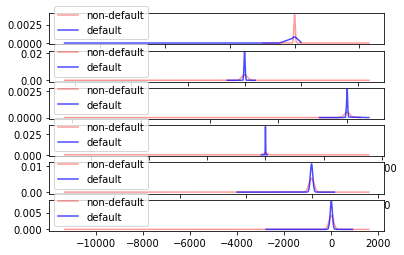

In [81]:
fig, axs = plt.subplots(6)
j = 0
p_values = []
sigmaar1 = []
muar1 = []

sigmaar0 = []
muar0 = []

for c in cols[43:49]:
    x1 = df_1[c].sort_values(ascending=True).values
    x0 = df_0[c].sort_values(ascending=True).values
    [t_, p_] = ttest_ind(x1, x0, equal_var=True)
    p_values.append(p_)
    x1_pdf = norm.pdf(x1, loc=np.mean(x1), scale=np.std(x1))
    x0_pdf = norm.pdf(x0, loc=np.mean(x0), scale=np.std(x0))
    mu1, sigma1 = norm.fit(x1_pdf)
    sigmaar1.append(sigma1)
    muar1.append(mu1)
    mu0, sigma0 = norm.fit(x0_pdf)
    sigmaar0.append(mu0)
    muar0.append(sigmaar0)
    axs[j].plot(x1, x1_pdf, color='red', alpha=0.4, label='non-default')
    axs[j].plot(x0, x0_pdf, color='blue', alpha=0.7, label='default')
    axs[j].legend()
    j += 1


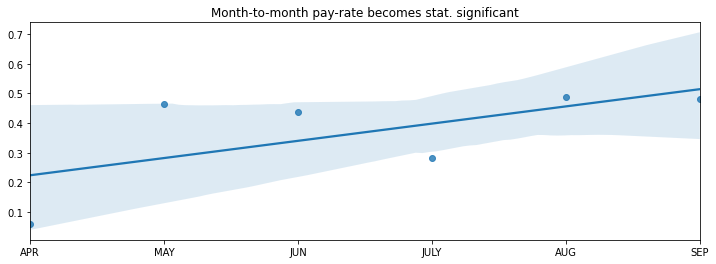

In [68]:
m = ['APR', 'MAY', 'JUN', 'JULY', 'AUG', 'SEP']
plt.figure(figsize=(12,4))

sns.regplot(x=np.arange(1,7), y=p_values)

plt.title('Month-to-month pay-rate becomes stat. significant')
plt.xticks(np.arange(1,7), m)
plt.show()

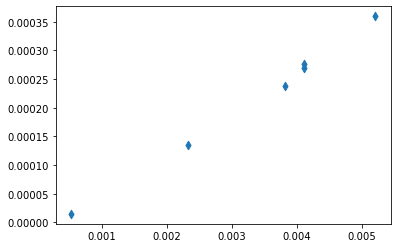

In [85]:
plt.scatter(muar1, sigmaar1, marker="d")
plt.show()